## QLIPP CALIBRATION NOTEBOOK

In [6]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [7]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Will Calibrate Using this ROI:


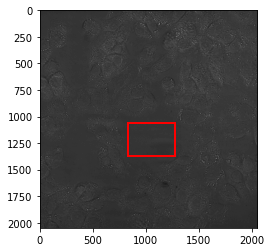

Would You Like to Calibrate Using this ROI? (Yes/No): 	yes
Calculating Blacklevel ...
Blacklevel: 121.35708845653116

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (65535.000000, 0.010000, 0.250000)
update (65534.963366, 0.010000, 0.350000)
update (65533.296413, 0.010000, 0.450000)
update (62304.452821, 0.010000, 0.550000)
update (62184.313569, 0.110000, 0.450000)
update (46748.550282, 0.110000, 0.550000)
update (39380.779698, 0.210000, 0.450000)
update (13405.905179, 0.210000, 0.550000)
update (6336.521373, 0.310000, 0.550000)
update (5786.552163, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 5786.552162592217
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 5786.552162592217

Starting fine search
iteration: 1
	Optimize lca ...
	lca = 0.29600
	lcb = 0.65000
	Intensity = 5458.6068566468975
	Intensity Difference = 4397.9711742%

	Optimize lcb ...
	lca

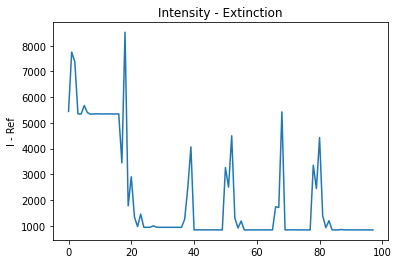

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.2581
setting LCB = 0.5867


Intensity = 2409.1711413279327
--------done--------

Calibrating State2 (I60)...
iteration: 1
	Optimizing lca w/ constrained lcb ...
	lca = 0.29568
	lcb = 0.57310
	Intensity = 2412.714516129032
	Intensity Difference = 0.1470786%
iteration: 2
	Optimizing lca w/ constrained lcb ...
	lca = 0.27920
	lcb = 0.60265
	Intensity = 2410.9902140893964
	Intensity Difference = 0.0755062%
iteration: 3
	Optimizing lca w/ constrained lcb ...
	lca = 0.27918
	lcb = 0.60269
	Intensity = 2413.3316866772743
	Intensity Difference = 0.1726961%
iteration: 4
	Optimizing lca w/ constrained lcb ...
	lca = 0.27925
	lcb = 0.60257
	Intensity = 2412.6380731954287
	Intensity Difference = 0.1439056%
iteration: 5
	Optimizing lca w/ constrained lcb ...
	lca = 0.27916
	lcb = 0.60272
	Intensity = 2411.8071604223924
	Intensity Difference = 0.1094160%
Exceeded 5 Iterations: Search discontinuing
Lowest Inten: [1.81907276], lca = [0.

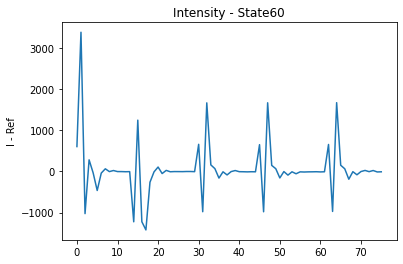

--------done--------

Calibrating State3 (I120)...

iteration: 1
	Optimizing lca w/ constrained lcb ...
	lca = 0.29873
	lcb = 0.60576
	Intensity = 2409.4342687689855
	Intensity Difference = 0.0109219%
iteration: 2
	Optimizing lca w/ constrained lcb ...
	lca = 0.29873
	lcb = 0.60577
	Intensity = 2409.485780413713
	Intensity Difference = 0.0130601%
iteration: 3
	Optimizing lca w/ constrained lcb ...
	lca = 0.29867
	lcb = 0.60566
	Intensity = 2409.5961087805586
	Intensity Difference = 0.0176396%
iteration: 4
	Optimizing lca w/ constrained lcb ...
	lca = 0.29874
	lcb = 0.60577
	Intensity = 2409.4623969333143
	Intensity Difference = 0.0120895%
iteration: 5
	Optimizing lca w/ constrained lcb ...
	lca = 0.29879
	lcb = 0.60586
	Intensity = 2410.5287284825686
	Intensity Difference = 0.0563508%
Exceeded 5 Iterations: Search discontinuing
Lowest Inten: [0.26312744], lca = [0.29872974], lcb = [0.60575913]
setting LCA = 0.2987
setting LCB = 0.6058


ratio: swing_LCB / swing_LCA = 1.8019 | target ra

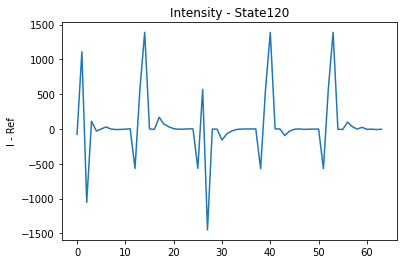

--------done--------

=======Finished Calibration=======

EXTINCTION = 308.6838969905621
Wall time: 1min 2s


In [10]:
%%time

calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.03
wavelength = 546
use_full_FOV = False
method = 'brent'

meta_dir = 'Q:\\Cameron\\2021_03_22_A549_OvernightAcqTest_63xOil\\'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_dir, method, use_full_FOV))

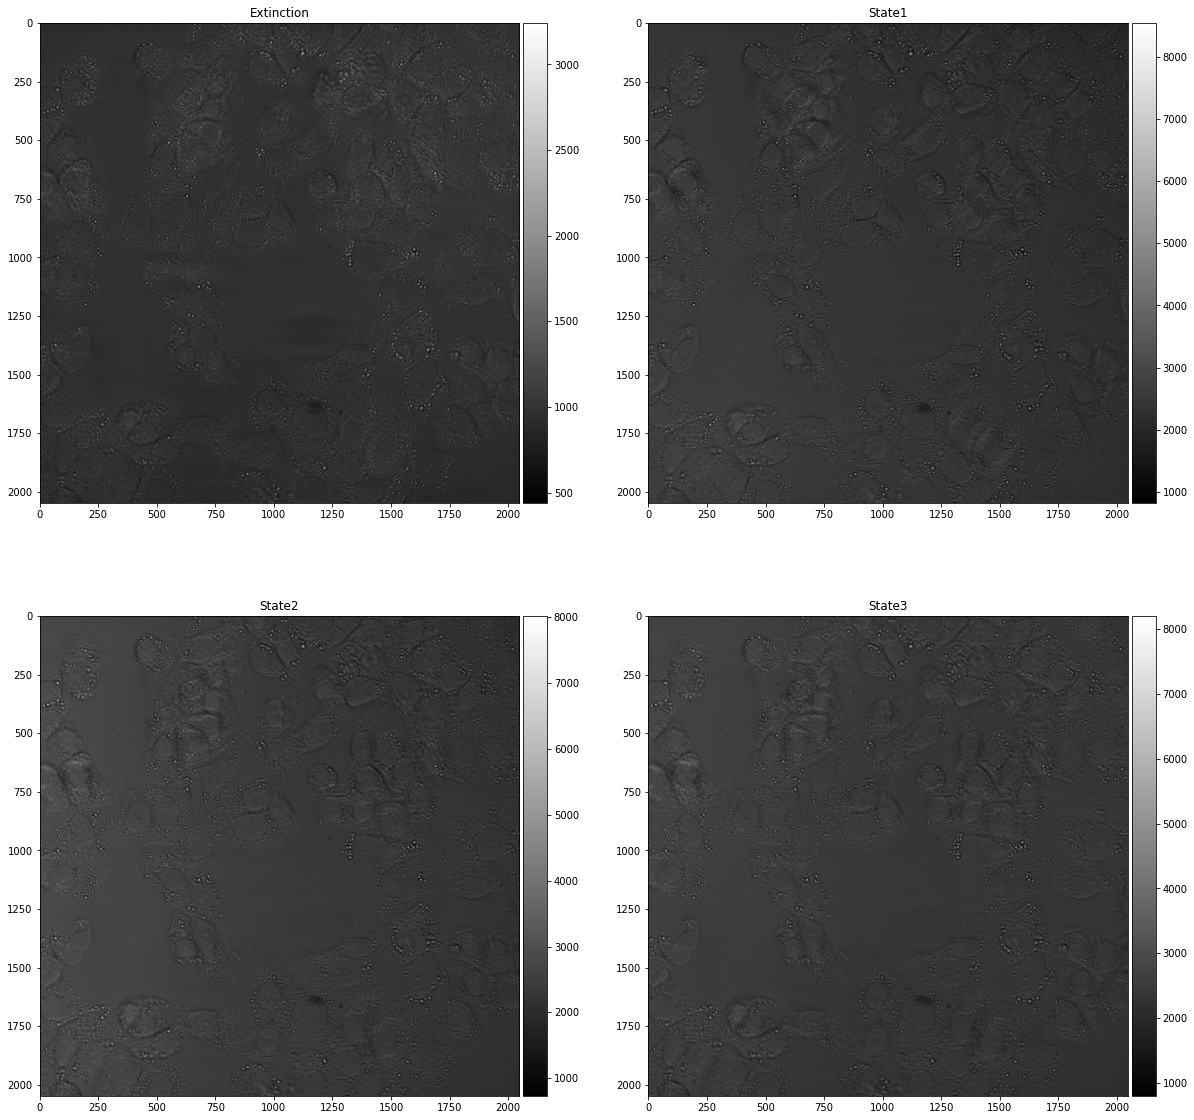

In [11]:
## Take set of BG Images

directory = 'Q:\\Cameron\\2021_03_22_A549_OvernightAcqTest_63xOil\\BG\\'

n_avg = 10

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)